# Longitud media umbral

## Description
Si representamos $L_g$ frente a $L_p$, para las **6521** especies de las que tenemos datos de genes y proteínas cruzadas (Figura 6), vemos que hasta un valor umbral 
$L_g = L_c$, la longitud media de los genes es 3 veces más grande que la de las proteínas y si representamos las varianzas ($\sigma^2$) hasta un valor $\sigma^2_g=\sigma^2_c$, la varianza de los genes es 9 veces mayor. Las distribuciones están simplemente escaladas.

### Modules

In [1]:
import os
import pandas as pd
#import plotnine as p9
from plotnine import *

## Observations: Statistical description of gene (and protein) length distributions in different species
### Retrieve the statistical description of the distributions


In [2]:
# data file
system = list(os.uname())[0]
if system == 'Linux':
    merged_6521_file = "/media/emuro/Wes/"
elif system == 'Darwin':
    pass # Fix this!
merged_6521_file = merged_6521_file + "results/geneLength/outputInputFiles/analysis/some_statistics/stat_description/taxid_merged/"
merged_6521_file = merged_6521_file + "stat_description.taxid_merged.ensembl_and_ref_proteome.tsv"
print(merged_6521_file)

# retrieve data
merged = pd.read_csv(merged_6521_file, sep="\t")
merged.rename(columns = {"merged_division_superregnum" : 'Clades'}, inplace = True)

# visualize data
print(merged.shape)
pd.set_option('display.max_columns', None)
if 1:
    display(merged.head(1))
    print("\nClades:\n", merged["Clades"].value_counts(), sep="")

/media/emuro/Wes/results/geneLength/outputInputFiles/analysis/some_statistics/stat_description/taxid_merged/stat_description.taxid_merged.ensembl_and_ref_proteome.tsv
(6521, 66)


,genes_species,genes_assembly,genes_trunk_genes_path,genes_genes_file,genes_count,genes_mean,genes_std,genes_var,genes_min,genes_25perc,genes_50perc,genes_75perc,genes_max,genes_log10_mean,genes_log10_std,genes_log10_var,genes_log10_min,genes_log10_25perc,genes_log10_50perc,genes_log10_75perc,genes_log10_max,genes_log_mean,genes_log_std,genes_log_var,genes_log_min,genes_log_25perc,genes_log_50perc,genes_log_75perc,genes_log_max,genes_division,tax_id,prots_species,prots_proteome_id,prots_superregnum,prots_num_prot_cod_genes,prots_uniprot_fasta_file,prots_count,prots_mean,prots_std,prots_var,prots_min,prots_25perc,prots_50perc,prots_75perc,prots_max,prots_log10_mean,prots_log10_std,prots_log10_var,prots_log10_min,prots_log10_25perc,prots_log10_50perc,prots_log10_75perc,prots_log10_max,prots_log_mean,prots_log_std,prots_log_var,prots_log_min,prots_log_25perc,prots_log_50perc,prots_log_75perc,prots_log_max,Clades,ratio_mean_prots_genes,diff_prots_genes,abs_diff,ratio_prots_genes
0,archangium_gephyra_gca_001027285,ASM102728v1,ftp.ensemblgenomes.org/pub/bacteria/release-49...,protein_coding.genes.archangium_gephyra_gca_00...,10119.0,1103.871035,1127.066255,1.270278e+06,113.0,524.0,887.0,1388.0,36653.0,2.919254,0.333869,0.111468,2.053078,2.719331,2.947924,3.142389,4.56411,6.721831,0.768762,0.590995,4.727388,6.261492,6.787845,7.235619,10.509251,bacteria,48,Archangium gephyra,UP000035579,bacteria,10110,/ftp.uniprot.org/pub/databases/uniprot/current...,10110.0,367.499703,375.772244,141204.779058,37.0,174.0,295.0,462.0,12217.0,2.441094,0.334836,0.112115,1.568202,2.240549,2.469822,2.664642,4.086965,5.620827,0.770987,0.594422,3.610918,5.159055,5.686975,6.135565,9.410584,bacteria,0.998757,-9.0,9.0,0.999111



Clades:
bacteria       5468
fungi           533
archaea         227
vertebrates      94
protist          91
plants           59
metazoa          49
Name: Clades, dtype: int64


#### Filter columns and clades

In [3]:
# Filter columns
merged = merged[["genes_species", "Clades", "tax_id", "genes_mean", "prots_mean"] + ["genes_var", "prots_var"]]

# Captura una referencia    
if 1: # tb. podría capturar varias
    captured = merged[(merged["genes_mean"]<=1506) & (merged["genes_mean"]>=1497)]
    captured = captured[(captured["prots_mean"]<=502) & (captured["prots_mean"]>=499)]
    captured = captured.sort_values(by='genes_mean')
    captured_species = "kazachstania_naganishii_cbs_8797_gca_000348985"
print("capture a reference:", captured.shape)
display(captured)

# Filter some clades if you want it
if 1:
    pass
elif 0:
    merged = merged.loc[merged["Clades"].isin(["bacteria", "archaea", "protist", "fungi"])]
elif 0:
    merged = merged.loc[merged["Clades"].isin(["bacteria", "archaea", "protist"])]
elif 0:
    merged = merged.loc[merged["Clades"].isin(["fungi", "metazoa", "vertebrates"])]
elif 0:
    merged = merged.loc[merged["Clades"].isin(["protist", "plants"])]
elif 0:
    merged = merged.loc[merged["Clades"].isin(["vertebrates"])]
elif 0:
    merged = merged.loc[merged["Clades"].isin(["fungi"])]
elif 0:
    merged = merged.loc[merged["Clades"].isin(["bacteria", "protist"])]
elif 0:
    merged = merged.loc[merged["Clades"].isin(["bacteria", "fungi"])] 
elif 0:
    merged = merged.loc[merged["Clades"].isin(["bacteria", "plants"])] 
elif 0:
    merged = merged.loc[merged["Clades"].isin(["bacteria", "vertebrates"])] 
#     kazachstania_naganishii_cbs_8797_gca_000348985
print(merged.shape)

capture a reference: (1, 7)


,genes_species,Clades,tax_id,genes_mean,prots_mean,genes_var,prots_var
3043,kazachstania_naganishii_cbs_8797_gca_000348985,fungi,1071383,1503.940237,499.711187,1.203042e+06,134805.486571


(6521, 7)


<!--
#### Calculate Taylor variance
As reference
For some lengths 
(Lg, Vg): (1500, )  
(Lp, Vp): (500, )
--> 

In [4]:
"""
import math

def variance_gene(Lg):
    return 0.016 * math.pow(Lg, 2.51)

def variance_prot(Lp):
    return 0.017 * math.pow(Lp, 2.6)

print("genes: (Lg, Vg)")
mu_nt_1500 = 1500 
v_nt_1500 = variance_gene(mu_nt_1500) 
print(mu_nt_1500, ",", v_nt_1500) 

print("proteins: (Lp, Vp)")
mu_aa_500 = 500 
v_aa_500 = variance_prot(mu_aa_500) 
print(mu_aa_500, ",", v_aa_500) 
"""

'\nimport math\n\ndef variance_gene(Lg):\n    return 0.016 * math.pow(Lg, 2.51)\n\ndef variance_prot(Lp):\n    return 0.017 * math.pow(Lp, 2.6)\n\nprint("genes: (Lg, Vg)")\nmu_nt_1500 = 1500 \nv_nt_1500 = variance_gene(mu_nt_1500) \nprint(mu_nt_1500, ",", v_nt_1500) \n\nprint("proteins: (Lp, Vp)")\nmu_aa_500 = 500 \nv_aa_500 = variance_prot(mu_aa_500) \nprint(mu_aa_500, ",", v_aa_500) \n'

## Comparing the means: $L_p$ vs. $L_g$ (log10 scale visualization)

In [5]:
# FUNCTIONS
###########
def plot__comparing_genes_prots(df2plot, col_x, col_y, x_lab, y_lab, title, x_capt, y_capt, bool_mean): 
    # limits and tick-breaks
    if 0: # limits. 1:Manual set up
          #         0:Automatic set up
        if bool_mean: # cmp means
            x_limits = [300, 90000]
            y_limits = [100, 1100]
        else: # comp vars
            x_limits = [5 * 10**4, 2 *10**10]
            y_limits = [5 * 10**3, 125 * 10**3]            
    else: # automatic
        x_limits=[min(df2plot[col_x].to_list())/1.3, 1.1*max(df2plot[col_x].to_list())]
        y_limits=[min(df2plot[col_y].to_list())/1.4, 1.1*max(df2plot[col_y].to_list())]
        if 0:
            print(x_limits, y_limits)
        
    if bool_mean: # mean
        x_breaks = [500, 1000, 1500, 2000, 2500, 5000, 7500, 10000, 15000, 20000, 30000, 40000, 50000, 80000]
        y_breaks = [100*x for x in range(1, 11)]
    else: # var
        x_breaks = [10**power for power in range(13)]
        y_breaks = [10**power for power in range(7)]
    
    if 0:
        print(x_limits, y_limits)
        print(x_breaks)
        
    p = (   
        ggplot(df2plot, aes(col_x, col_y, color=legends_by)) + geom_point(size=0.01)
        + geom_hline(yintercept=y_capt, alpha=0.2) # add one horizonal line
        + geom_vline(xintercept=x_capt, alpha=0.2) # add one vertical line
        + labs(title=title, x=x_lab, y=y_lab) 
        + scale_color_manual(values=['#D83B01', '#002050', '#A80000', '#FFA500', '#107C10','#EF008C', '#0078D7', '#B4009E']) 
        + labs(color='Clade') # legend title
        + scale_x_log10(breaks=x_breaks, limits=x_limits)
        + scale_y_log10(breaks=y_breaks, limits=y_limits)
        + theme(legend_position=(0.8,0.3), legend_key_size=5, legend_background=element_rect(fill='grey', alpha=0.01)) 
        + theme(figure_size=(18,6)) # preserve the scale of the units nt vs. 3*aa
    )
    if 1:
        print(p)

In [6]:
# L_g vs. L_p
#############
df2plot = merged
col_x = "genes_mean"
col_y = "prots_mean"
legends_by = "Clades"
#
title = "$L_g$ vs. $L_p$ (visualization: $log10$ scale)"
x_lab = "Mean gene length (nt)"
y_lab = "Mean protein length (aa)"
#
x_capt = captured[captured["genes_species"]=="kazachstania_naganishii_cbs_8797_gca_000348985"]["genes_mean"]
y_capt = captured[captured["genes_species"]=="kazachstania_naganishii_cbs_8797_gca_000348985"]["prots_mean"]
#
bool_mean = True
params_mean_cmp = [df2plot, col_x, col_y, x_lab, y_lab, title, x_capt, y_capt, bool_mean].copy()


pm = params_mean_cmp     # [df2plot, col_x, col_y, x_lab, y_lab, title, x_capt, y_capt, bool_mean]
#plot
if 0:
    plot__comparing_genes_prots(pm[0],   pm[1], pm[2], pm[3], pm[4], pm[5], pm[6],  pm[7],  pm[8])

**Figure caption:** Each point represents, for one species, the mean of the distribution of the length of its genes versus the mean of the distribution of the length of its proteins. 
The black line describes the trend observed in these data, going from a regime in which the average size of the proteins grows proportionally to the average size of the genes, to another in which the size of the protein stabilizes and does not depend on gene length. Lc=(1500nt, 500aa).

**Figure caption:** Each point represents, for one species, the variance of the distribution of the length of its genes versus the variance of the distribution of the length of its proteins. 

## Comparing the means: $\sigma^2_p$ vs. $\sigma^2_g$ (log10 scale visualization)
This figure is not in the paper

In [7]:
# V_g vs. V_p
#############
df2plot = merged
col_x = "genes_var"
col_y = "prots_var"
legends_by = "Clades"
#
title = "$\sigma^2_g$ vs. $\sigma^2_p$ (visualization: $log10$ scale)"
x_lab = "$\sigma^2_g$ (nt^{2})"
y_lab = "$\sigma^2_p$ (aa^{2})"
#
x_capt = captured[captured["genes_species"]=="kazachstania_naganishii_cbs_8797_gca_000348985"]["genes_var"]
y_capt = captured[captured["genes_species"]=="kazachstania_naganishii_cbs_8797_gca_000348985"]["prots_var"]
#
bool_mean = False # it is the var not mean
params_var_cmp = [df2plot, col_x, col_y, x_lab, y_lab, title, x_capt, y_capt, bool_mean].copy()


pv = params_var_cmp      # [df2plot, col_x, col_y, x_lab, y_lab, title, x_capt, y_capt, bool_mean]
#plot
if 0:
    plot__comparing_genes_prots(pv[0],   pv[1], pv[2], pv[3], pv[4], pv[5], pv[6],  pv[7],  pv[8])

This figure is not in the paper

## Compare the plots

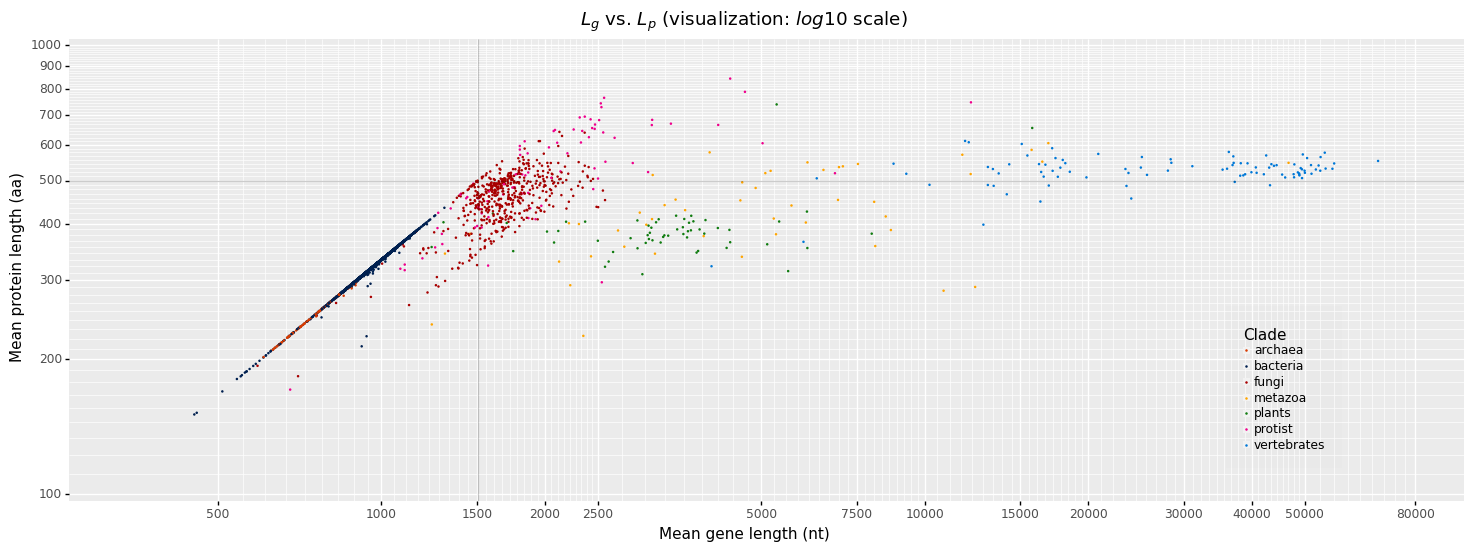

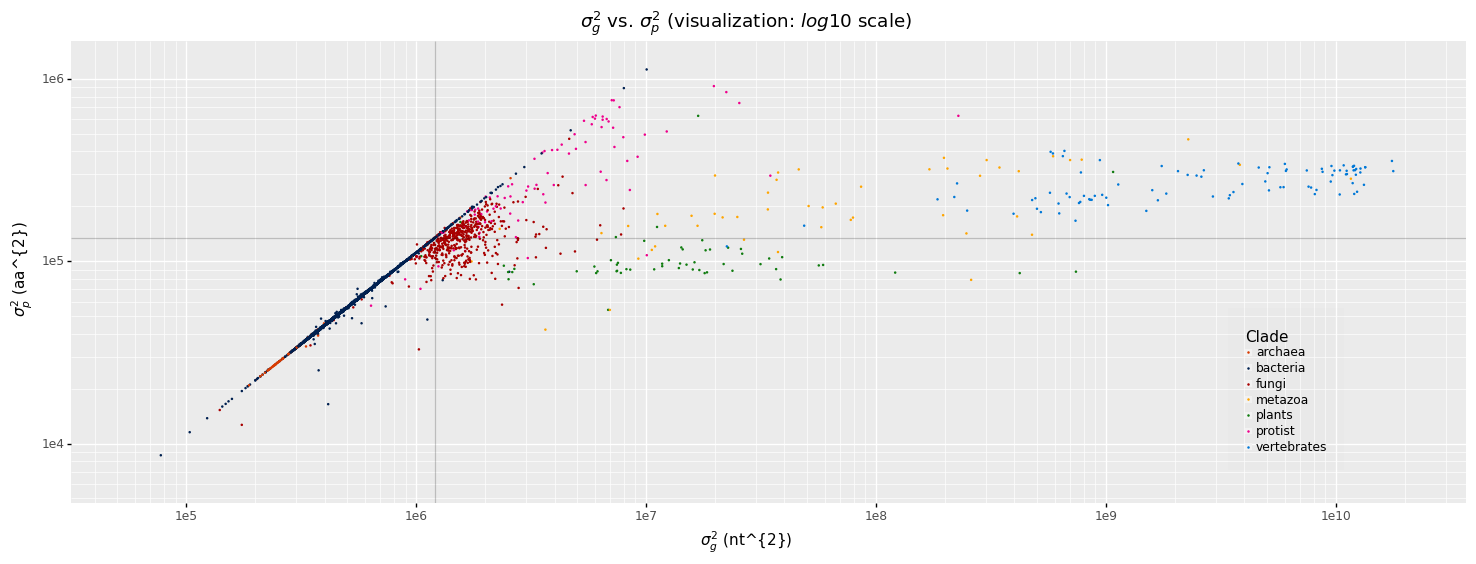

In [8]:
df2plot_m = pm[0].copy()
df2plot_v = pv[0].copy()
# filter clades
if 1: # all kingdoms
    pass
elif 0: # 'bacteria' < 'archaea' < 'protists' < 'metazoa' < 'vertebrates'
    pm[0] = df2plot_m[~df2plot_m[legends_by].isin(["fungi", "plants"])] 
    pv[0] = df2plot_v[~df2plot_v[legends_by].isin(["fungi", "plants"])]
elif 0: # 'bacteria' < 'archaea' < 'protists' < 'plants'
    pm[0] = df2plot_m[~df2plot_m[legends_by].isin(["fungi", "metazoa", "vertebrates"])] 
    pv[0] = df2plot_v[~df2plot_v[legends_by].isin(["fungi", "metazoa", "vertebrates"])]
elif 0: # 'bacteria' < 'archaea' < 'protists' < 'fungi'
    pm[0] = df2plot_m[~df2plot_m[legends_by].isin(["plants", "metazoa", "vertebrates"])] 
    pv[0] = df2plot_v[~df2plot_v[legends_by].isin(["plants", "metazoa", "vertebrates"])]
elif 0: # 'archaea' < 'protists' < 'fungi'
    pm[0] = df2plot_m[~df2plot_m[legends_by].isin(["plants", "metazoa", "vertebrates", "bacteria"])]
    pv[0] = df2plot_v[~df2plot_v[legends_by].isin(["plants", "metazoa", "vertebrates", "bacteria"])]
elif 0: # 'archaea' < 'protists'
    pm[0] = df2plot_m[~df2plot_m[legends_by].isin(["plants", "metazoa", "vertebrates", "bacteria", "fungi"])]
    pv[0] = df2plot_v[~df2plot_v[legends_by].isin(["plants", "metazoa", "vertebrates", "bacteria", "fungi"])]
    
# filter protists also
df2plot_m = pm[0].copy()
df2plot_v = pv[0].copy()
if 1: # with protist
    pass
elif 0: # without protists
    pm[0] = df2plot_m[ ~df2plot_m[legends_by].isin(["protist"])] 
    pv[0] = df2plot_v[ ~df2plot_v[legends_by].isin(["protist"])]   
    
#plot mean
pm = params_mean_cmp     # [df2plot, col_x, col_y, x_lab, y_lab, title, x_capt, y_capt, bool_mean]
plot__comparing_genes_prots(pm[0],   pm[1], pm[2], pm[3], pm[4], pm[5], pm[6],  pm[7],  pm[8])

#plot var
pv = params_var_cmp      # [df2plot, col_x, col_y, x_lab, y_lab, title, x_capt, y_capt, bool_mean]
plot__comparing_genes_prots(pv[0],   pv[1], pv[2], pv[3], pv[4], pv[5], pv[6],  pv[7],  pv[8])